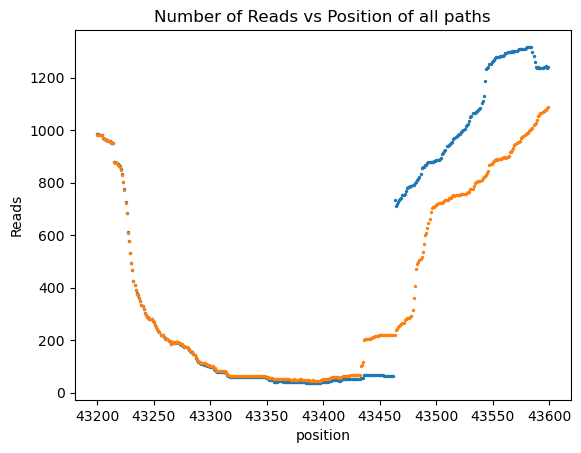

In [62]:
# The Idea is the analysis Phage bubble just like before but automate into many samples: 
import pysam
from pysam.libcalignmentfile import IteratorColumnRegion
import matplotlib.pyplot as plt
from scipy import stats
import os
from Bio import SeqIO


# Truncated Pileup function for precises locating of varying regions.
def pileup_truncated(bam,contig, start, stop):
    """
    Obtain Pysam columns only at selected region
    """
    has_coord, rtid, rstart, rstop = bam.parse_region(contig, start, stop)
    yield from IteratorColumnRegion(bam,
                                    tid=rtid,
                                    start=rstart,
                                    stop=rstop,truncate=True)

def scatter_plot_PHAGEBB(file):     
    paths = range(1,10)
    
    ### Finding the contigs for Pileup:
    # first, call contigs as an array, 
    # n will represent the paths (n = 1 : path 1, etc)
    contigs = []
    for n in paths:
        fasta_file = f"PHAGE_BUBBLE/Paths/Paths S1/path_{n}.fasta"
        if not os.path.exists(fasta_file): # If the paths doesnt exist, then continue.
            continue
        for record in SeqIO.parse(fasta_file, "fasta"):
            contigs.append(record.id) # Isolate the contigs only using record.id command.
#     print(contigs)
    
    ### Creating a plot for position vs reads
    # First call an array for position and read:

    for n in paths: 
        position = []
        reads = []
        if len(contigs) >= n: # contigs is an array of contigs, hence, if len(contigs) > n, then paths will not exist:
            selected_contigs = contigs[n-1] # This code is important for using the correct contigs later in pileup
            file_path = f"PHAGE_BUBBLE/Bam_sorted/{file}_path_{n}_sorted.bam"
            if os.path.exists(file_path): 
                bamfile = pysam.AlignmentFile(file_path, "rb")
                for pileupcolumn in pileup_truncated(bamfile, f"{selected_contigs}".strip("['']"), 43200, 43600):
                    position.append(pileupcolumn.pos)
                    reads.append(pileupcolumn.n)                  
    
                ### Creating a plot for all position vs reads: 
                plt.scatter(position, reads, 2, label=f"path{n}")
                plt.xlabel('position')
                plt.ylabel('Reads')
                plt.title('Number of Reads vs Position of all paths')
                plt.show
                
#                 fig, ax = plt.subplots(figsize=(10,5))
#                 s = 1
#                 ax.scatter(pos, n, s, label=f"Path{n}")

#                 ax.set_xlabel("Positions")
#                 ax.set_ylabel("number of Reads")
#                 plt.legend(loc="upper left")
#                 plt.title(f'Number of Reads vs Position of paths {n}')

    return

scatter_plot_PHAGEBB("Phage42")

In [262]:
import os

def files_to_matrix(directory):
    file_matrix = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_matrix.append(file_path)
    return file_matrix

# Example usage
directory_path = "PHAGE_BUBBLE/Paths/Paths S1"
Paths = files_to_matrix(directory_path)
print(Paths)

['PHAGE_BUBBLE/Paths/Paths S1/path_1.fasta', 'PHAGE_BUBBLE/Paths/Paths S1/path_2.fasta']


In [18]:
### Function for printing the coverages at specific position: 
import pysam
import os 

def print_coverage_at_base(filepaths, start, end):
    contigs = []
    paths = range(1,100) # These are the paths, the limit was put at 100 for 
    for n in paths:
        fasta_file = f"PHAGE_BUBBLE/Paths/Paths S1/path_{n}.fasta"
        if not os.path.exists(fasta_file):
            continue
        for record in SeqIO.parse(fasta_file, "fasta"):
            contigs.append(record.id)  
    print(contigs)

    for n in paths: 
        selected_contigs = contigs[:n]
        if len(selected_contigs) >= n:       
            selected_contigs = contigs[n-1] # n - 1 as the first digit start at 0
            bamfile = pysam.AlignmentFile(f"{file}_path_{n}_sorted.bam", "rb")
            for pileupcolumn in pileup_truncated(bamfile, f"{selected_contigs}".strip("['']"), start, end):
                print("\ncoverage at base %s = %s" % (pileupcolumn.pos, pileupcolumn.n))
            bamfile.close()
            
print_coverage_at_base("PHAGE_BUBBLE/Bam_sorted/M524_I6790_27765_Parkes_IBD_292_V4_2_11_16_NEBNextIndex35_CATTTT_S10_L001", 0, 10)

['path_1_edge_91047_edge_5628', 'path_2_edge_91047_edge_91048']

coverage at base 0 = 544

coverage at base 1 = 548

coverage at base 2 = 551

coverage at base 3 = 553

coverage at base 4 = 554

coverage at base 5 = 559

coverage at base 6 = 561

coverage at base 7 = 563

coverage at base 8 = 564

coverage at base 9 = 567

coverage at base 0 = 544

coverage at base 1 = 548

coverage at base 2 = 551

coverage at base 3 = 553

coverage at base 4 = 554

coverage at base 5 = 559

coverage at base 6 = 561

coverage at base 7 = 563

coverage at base 8 = 564

coverage at base 9 = 567
